In [1]:
import numpy as np
from itertools import combinations

In [2]:
from collections import deque
from matplotlib import pyplot as plt
import Field
import Game
import Agent
import Cards
from utils import * 
from importlib import reload
from random import choice, shuffle

reload(Field)
reload(Game)
reload(Agent)
reload(Cards)

<module 'Cards' from '/home/clark/Apps/durakula/game/Cards.py'>

In [3]:
numplayers = 4
durak_game = Game.DurakGame(numplayers, 'small')

In [52]:
for p in durak_game.players:
    print(p.player_mode)

MODE_DEFEND
MODE_ATTACK
MODE_ATTACK
MODE_ATTACK


In [53]:
print(durak_game.playing_field)

--- Playing Field ---
Drawing DurakDeck: --- Card Collection ---
Cards: C3,D3,D1,H0,C4,S6,H3,D4,H7,D6.
Size: 10
-----------------------

0:--- Card Collection ---
Cards: D2,D5,D7,D8,C6,H8.
Size: 6
-----------------------

1:--- Card Collection ---
Cards: C0,C2,H1,H5,S2,S5.
Size: 6
-----------------------

2:--- Card Collection ---
Cards: D0,C1,C5,H4,H6,S1,S8.
Size: 7
-----------------------

3:--- Card Collection ---
Cards: C7,C8,S0,S3,S4.
Size: 5
-----------------------

Trump suit is Diamonds
---------------------



In [54]:
players_on_attack = [p.player_id for p in durak_game.playing_field.attack_players()]
p_att_idx = players_on_attack[0]
print(durak_game.players[p_att_idx].get_deck_from_hand())

--- Card Collection ---
Cards: C0,C2,H1,H5,S2,S5.
Size: 6
-----------------------



In [55]:
p_def_idx = durak_game.playing_field.defend_player().player_id
print(durak_game.players[p_def_idx].get_deck_from_hand())

--- Card Collection ---
Cards: D2,D5,D7,D8,C6,H8.
Size: 6
-----------------------



In [56]:
durak_game.playing_field.first_attack

False

In [57]:
attack_moves = durak_game.playing_field.get_legal_moves(p_att_idx)
attack_moves

[((0, 2),), ((1, 2),), ((0, 2), (1, 2)), ()]

In [58]:
random_move = choice(durak_game.playing_field.get_legal_moves(p_att_idx))
print(random_move)

()


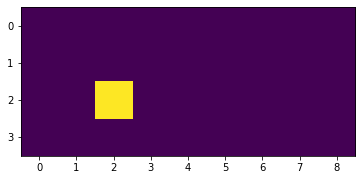

In [59]:
durak_game.playing_field.execute_move(random_move, p_att_idx)
plt.imshow(durak_game.playing_field.attacks)

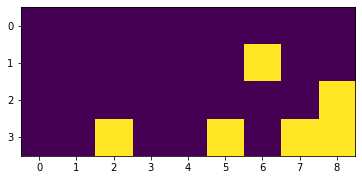

In [60]:
plt.imshow(durak_game.players[p_def_idx].hand)

In [61]:
# player = durak_game.players[p_def_idx]
# attack_idxs = np.flatnonzero(durak_game.playing_field.attacks)
# n_vals = durak_game.playing_field.n_vals
# n_suits = durak_game.playing_field.n_suits
# nontrump_attack_idxs = attack_idxs[attack_idxs >= n_vals]
# valid_defenses = np.zeros_like(durak_game.playing_field.field)
# f = lambda x : (x // n_vals + 1)*n_vals

# for att_idx in attack_idxs:
#     valid_defenses[att_idx + 1 : f(att_idx), att_idx] = 1
# for att_idx in nontrump_attack_idxs:
#     valid_defenses[:n_vals, att_idx] = 1

# if durak_game.playing_field.first_attack:
#     valid_defenses[att_idx % n_vals : att_idx % n_vals + n_suits*n_vals : n_vals, att_idx] = 1

# valid_defenses *= player.hand.ravel()[:,np.newaxis]
# plt.imshow(valid_defenses)

In [62]:
valid_defenses = np.zeros_like(durak_game.playing_field.field)
durak_game.playing_field.defense_combinations(valid_defenses)

['ACTION_GIVEUP']

In [63]:
defend_actions = durak_game.playing_field.get_legal_moves(p_def_idx)
print(defend_actions)

['ACTION_GIVEUP', ((26, 20),)]


In [64]:
random_defend = choice(defend_actions)
print(random_defend)
# random_defend = 'ACTION_GIVEUP'

ACTION_GIVEUP


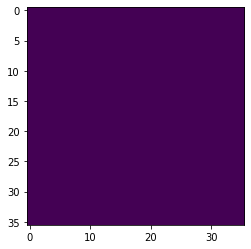

In [65]:
durak_game.get_next_state(random_defend, p_def_idx)
plt.imshow(durak_game.playing_field.field)

In [66]:
for p in durak_game.players:
    print(p.player_mode)

MODE_WAIT
MODE_ATTACK
MODE_DEFEND
MODE_WAIT


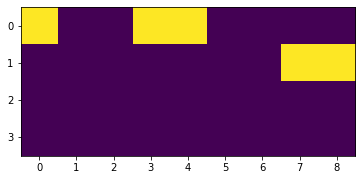

In [50]:
plt.imshow(durak_game.players[p_att_idx].hand)

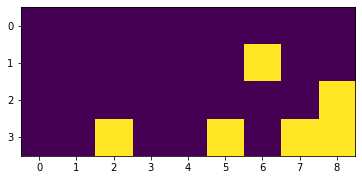

In [51]:
plt.imshow(durak_game.players[p_def_idx].hand)